Demonstration of CVAE as in Doersch's tutorial.

In [1]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
from simple_fc import Encoder,Decoder
from cvae import Conditional_Variational_Autoencoder
from misc_ops import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [4]:
#from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.framework import dtypes
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from dataset import DataSet
mnist = read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Middle column

In [3]:
tf.reset_default_graph()

In [4]:
#Training

#sess = tf.InteractiveSession()
#build_encoder = Encoder(200)
#build_decoder = Decoder(200)
#model = Conditional_Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,
#                                            z_dim = 50,img_dim = 784,dataset = mnist.train,
#                                            learning_rate = 0.001, num_epochs = 50,
#                                           get_cond_info = get_middle_column, cond_info_dim = 28,
#                                           checkpoint_name = 'cvae_middle_column')
#model.train()

Epoch 1 loss: 172.049853516
Epoch 2 loss: 127.242726787
Epoch 3 loss: 115.941825686
Epoch 4 loss: 110.595778046
Epoch 5 loss: 107.577884369
Epoch 6 loss: 105.600379819
Epoch 7 loss: 104.023695887
Epoch 8 loss: 102.825846128
Epoch 9 loss: 101.757672979
Epoch 10 loss: 100.921128748
Epoch 11 loss: 100.163944369
Epoch 12 loss: 99.5562706687
Epoch 13 loss: 99.0573798995
Epoch 14 loss: 98.5557486239
Epoch 15 loss: 98.1194218445
Epoch 16 loss: 97.7298730053
Epoch 17 loss: 97.3415686867
Epoch 18 loss: 97.0089744013
Epoch 19 loss: 96.6902320446
Epoch 20 loss: 96.4316018677
Epoch 21 loss: 96.2273455256
Epoch 22 loss: 95.9440577698
Epoch 23 loss: 95.7936150707
Epoch 24 loss: 95.5560306202
Epoch 25 loss: 95.4222324996
Epoch 26 loss: 95.2550947571
Epoch 27 loss: 95.0945832825
Epoch 28 loss: 94.9652292841
Epoch 29 loss: 94.8248257724
Epoch 30 loss: 94.7010098544
Epoch 31 loss: 94.5335946378
Epoch 32 loss: 94.4550782082
Epoch 33 loss: 94.3424192533
Epoch 34 loss: 94.2210974953
Epoch 35 loss: 94.09790

In [5]:
# Load checkpoint
sess = tf.InteractiveSession()
build_encoder = Encoder(200)
build_decoder = Decoder(200)
model = Conditional_Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,
                                            z_dim = 50,img_dim = 784,dataset = mnist.train,
                                            learning_rate = 0.001, num_epochs = 50,
                                           get_cond_info = get_middle_column, cond_info_dim = 28,
                                           load = True, load_file = 'checkpoints/cvae_middle_column')

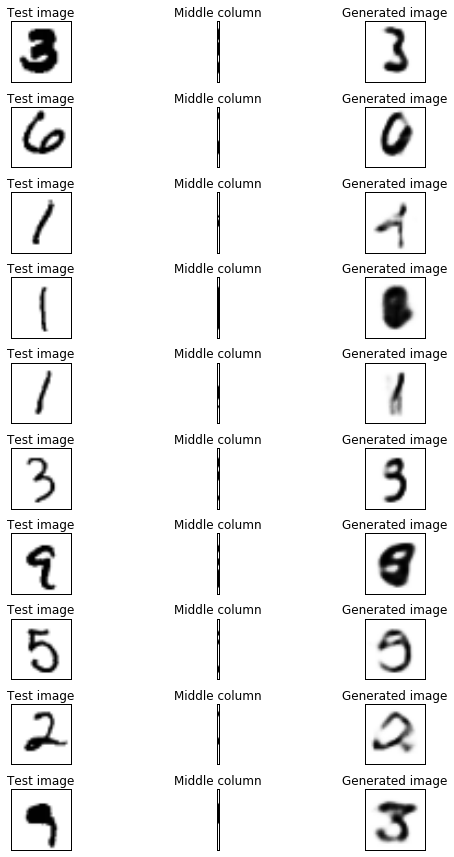

In [7]:
images, _ = mnist.test.next_batch(100)
info = get_middle_column(images)
generated_images = model.generate(num=100, info=info)

num_show = 10
fig = plt.figure(figsize=(8,12))
for i in xrange(num_show):
    plt.subplot(num_show, 3, 3*i+1)
    plt.imshow(images[i,].reshape(28, 28), cmap='gray_r')
    plt.title('Test image')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(num_show, 3, 3*i+2)
    plt.imshow(info[i,].reshape(28,1), cmap='gray_r')
    plt.title('Middle column')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(num_show, 3, 3*i+3)
    plt.imshow(generated_images[i,].reshape(28,28), cmap='gray_r')
    plt.title('Generated image')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.savefig('images/middle_column')
plt.show()

In [8]:
sess.close()
tf.reset_default_graph()

# Left half

In [9]:
# Training
#sess = tf.InteractiveSession()
#build_encoder = Encoder(200)
#build_decoder = Decoder(200)
#model = Conditional_Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,
#                                            z_dim = 50,img_dim = 784,dataset = mnist.train,
#                                            learning_rate = 0.001, num_epochs = 50,
#                                           get_cond_info = get_left_half, cond_info_dim = 392,
#                                           checkpoint_name = 'cvae_left_half_checkpoint')
#model.train()

Epoch 1 loss: 143.796389715
Epoch 2 loss: 103.497879888
Epoch 3 loss: 95.5284684199
Epoch 4 loss: 91.8802712458
Epoch 5 loss: 89.8646026056
Epoch 6 loss: 88.3248768338
Epoch 7 loss: 87.2070320684
Epoch 8 loss: 86.2727665017
Epoch 9 loss: 85.5468312489
Epoch 10 loss: 84.9073575384
Epoch 11 loss: 84.3374476069
Epoch 12 loss: 83.8387883689
Epoch 13 loss: 83.4084136269
Epoch 14 loss: 82.9957210194
Epoch 15 loss: 82.6972249256
Epoch 16 loss: 82.4080876715
Epoch 17 loss: 82.1286993824
Epoch 18 loss: 81.8616662736
Epoch 19 loss: 81.6620029796
Epoch 20 loss: 81.4553696095
Epoch 21 loss: 81.2169121482
Epoch 22 loss: 81.0804216142
Epoch 23 loss: 80.9213578242
Epoch 24 loss: 80.7483424655
Epoch 25 loss: 80.6009133079
Epoch 26 loss: 80.4726229581
Epoch 27 loss: 80.3186355036
Epoch 28 loss: 80.1890283619
Epoch 29 loss: 80.1338093983
Epoch 30 loss: 79.9703874484
Epoch 31 loss: 79.8776939115
Epoch 32 loss: 79.76759423
Epoch 33 loss: 79.6888404291
Epoch 34 loss: 79.6561208274
Epoch 35 loss: 79.5574664

In [5]:
# Load checkpoint
sess = tf.InteractiveSession()
build_encoder = Encoder(200)
build_decoder = Decoder(200)
model = Conditional_Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,
                                            z_dim = 50,img_dim = 784,dataset = mnist.train,
                                            learning_rate = 0.001, num_epochs = 50,
                                           get_cond_info = get_left_half, cond_info_dim = 392,
                                           load = True, load_file = 'checkpoints/cvae_left_half_checkpoint')

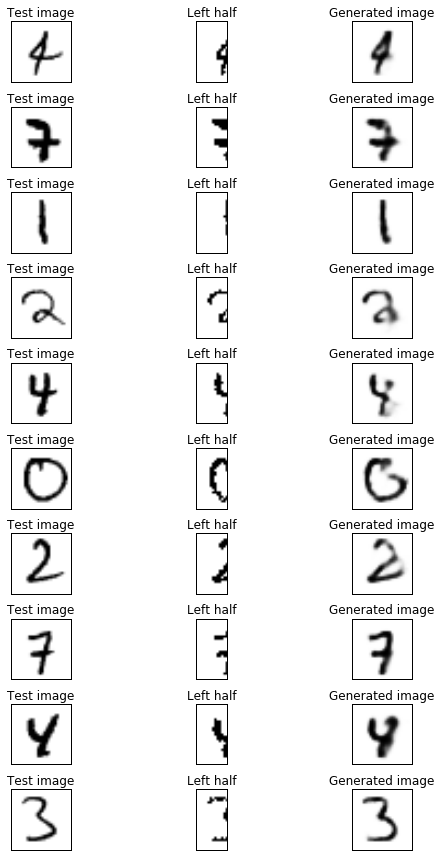

In [10]:
images, _ = mnist.test.next_batch(100)
info = get_left_half(images)
generated_images = model.generate(num=100, info=info)

num_show = 10
plt.figure(figsize=(8,12))
for i in xrange(num_show):
    plt.subplot(num_show, 3, 3*i+1)
    plt.imshow(images[i,].reshape(28, 28), cmap='gray_r')
    plt.title('Test image')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(num_show, 3, 3*i+2)
    plt.imshow(info[i,].reshape(28,14), cmap='gray_r')
    plt.title('Left half')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(num_show, 3, 3*i+3)
    plt.imshow(generated_images[i,].reshape(28,28), cmap='gray_r')
    plt.title('Generated image')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.savefig('images/left_half')
plt.show()

In [6]:
sess.close()
tf.reset_default_graph()

# Label

In [15]:
# Training
#sess = tf.InteractiveSession()
#build_encoder = Encoder(200)
#build_decoder = Decoder(200)
#model = Conditional_Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,
#                                            z_dim = 50,img_dim = 784,dataset = mnist.train,
#                                            learning_rate = 0.001, num_epochs = 50,
#                                           condition_on_label=True,
#                                            checkpoint_name = 'cvae_label_checkpoint')
#model.train()

Epoch 1 loss: 175.599890192
Epoch 2 loss: 130.333059581
Epoch 3 loss: 119.389594602
Epoch 4 loss: 114.145837527
Epoch 5 loss: 110.766792505
Epoch 6 loss: 108.405731437
Epoch 7 loss: 106.706271459
Epoch 8 loss: 105.287936055
Epoch 9 loss: 104.113988634
Epoch 10 loss: 103.175970279
Epoch 11 loss: 102.362595409
Epoch 12 loss: 101.729221608
Epoch 13 loss: 101.069102672
Epoch 14 loss: 100.568113362
Epoch 15 loss: 100.08731591
Epoch 16 loss: 99.6511147516
Epoch 17 loss: 99.2035227411
Epoch 18 loss: 98.892423387
Epoch 19 loss: 98.6186203835
Epoch 20 loss: 98.2720773732
Epoch 21 loss: 98.0164162792
Epoch 22 loss: 97.7436336032
Epoch 23 loss: 97.5100465254
Epoch 24 loss: 97.2764567705
Epoch 25 loss: 97.0629121676
Epoch 26 loss: 96.8643209423
Epoch 27 loss: 96.7228375105
Epoch 28 loss: 96.5324681507
Epoch 29 loss: 96.350379819
Epoch 30 loss: 96.2185681846
Epoch 31 loss: 96.0293813116
Epoch 32 loss: 95.8727684576
Epoch 33 loss: 95.7431697221
Epoch 34 loss: 95.6596166437
Epoch 35 loss: 95.54249766

In [7]:
# Load checkpoint
sess = tf.InteractiveSession()
build_encoder = Encoder(200)
build_decoder = Decoder(200)
model = Conditional_Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,
                                            z_dim = 50,img_dim = 784,dataset = mnist.train,
                                            learning_rate = 0.001, num_epochs = 50,
                                           condition_on_label=True,
                                            load = True, load_file = 'checkpoints/cvae_label_checkpoint',
                                           checkpoint_name='test')

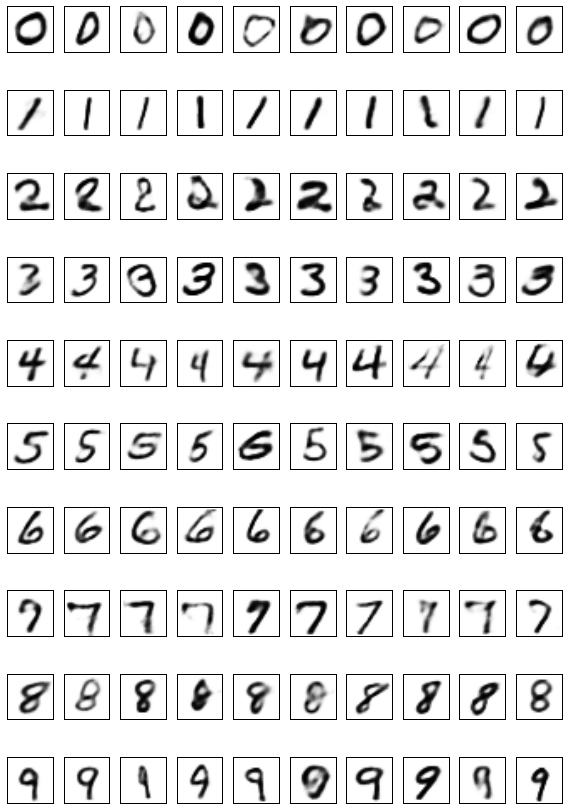

In [9]:
#images, info = mnist.test.next_batch(100)
num_examples = 10

info = np.repeat(np.identity(10), num_examples, axis=0)
generated_images = model.generate(num=100, info=info)

num_show = 5
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.savefig('images/by_label')
plt.show()

In [28]:
testx = mnist.test.images[xrange(100)]
testy = mnist.test.labels[xrange(100)]
mu, log_sigma2 = sess.run([model.encoder_mean, model.encoder_log_sigma2],
                         feed_dict = {model.images: test, model.batch_info: testy})

generated_images = np.zeros((10, 100, 28*28))
for j in xrange(10):
    info = np.repeat(np.identity(10)[j,].reshape(1,-1), 100, axis=0) # hack for repeating label j
    generated_images[j,:,:] = sess.run(model.decoder_mean,
                                      feed_dict = {model.batch_eps : np.random.randn(100, 50),
                                                  model.batch_info: info,
                                                  model.encoder_mean: mu,
                                                  model.encoder_log_sigma2: log_sigma2})

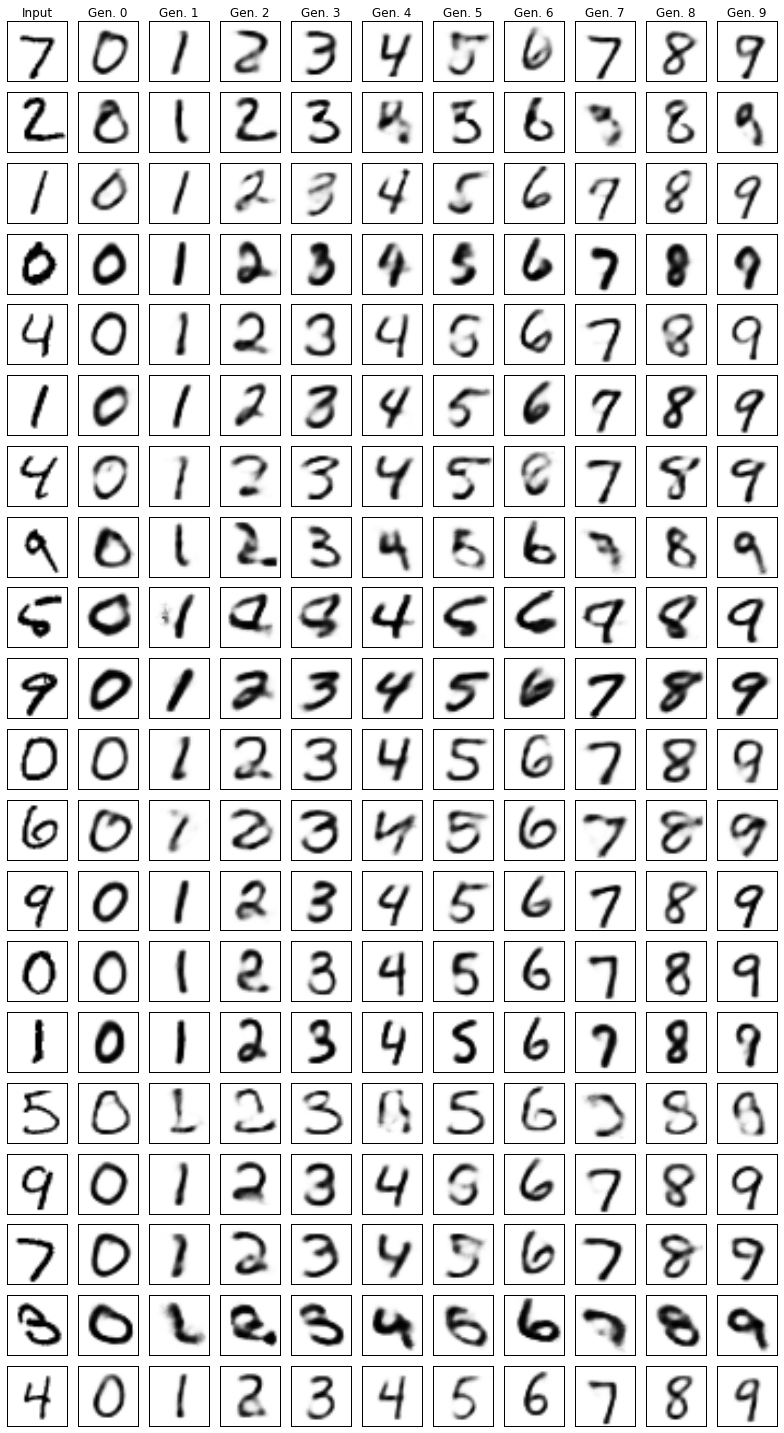

In [44]:
subset = xrange(20)
testx_subset = testx[subset]
generated_images_subset = generated_images[:, subset, :]

plt.figure(figsize=(11,len(subset)))
#plt.figure(figsize=(len(subset),11))
for i in xrange(len(subset)):
    plt.subplot(len(subset), 11, 11*i+1)
    plt.imshow(testx_subset[i].reshape(28,28), cmap='gray_r')
    if i == 0:
        plt.title('Input')
    plt.xticks([])
    plt.yticks([])
    for j in xrange(10):
        plt.subplot(len(subset),11, 11*i+j+2)
        plt.imshow(generated_images_subset[j,i,:].reshape(28,28), cmap='gray_r')
        if i == 0:
            plt.title('Gen. {}'.format(j))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.savefig('images/style')
plt.show()

In [15]:
sess.close()
tf.reset_default_graph()

# Style